<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [33]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

noise.loc[:,'chord_length'].nunique()

6

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data set meausures the scaled sound presure level (in decibles) of different NACA 0012 airfoils when they are acoustically tested in anechoic chambers. The tests vary by the following features: frequency', 'angle', 'chord_length', 'free_stream_velocity', and 'displacement_thickness'. It seems that some of these features are different settings in the way air flow is directed, and some are differences in the actual NACA 0012 airfolds. More information from a domain specialist is required to gain a fuller understanding of these features, but the data should be sufficient to create a predictive model. 

- Find out how many rows and columns are in `noise`.

In [34]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [35]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [36]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [37]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

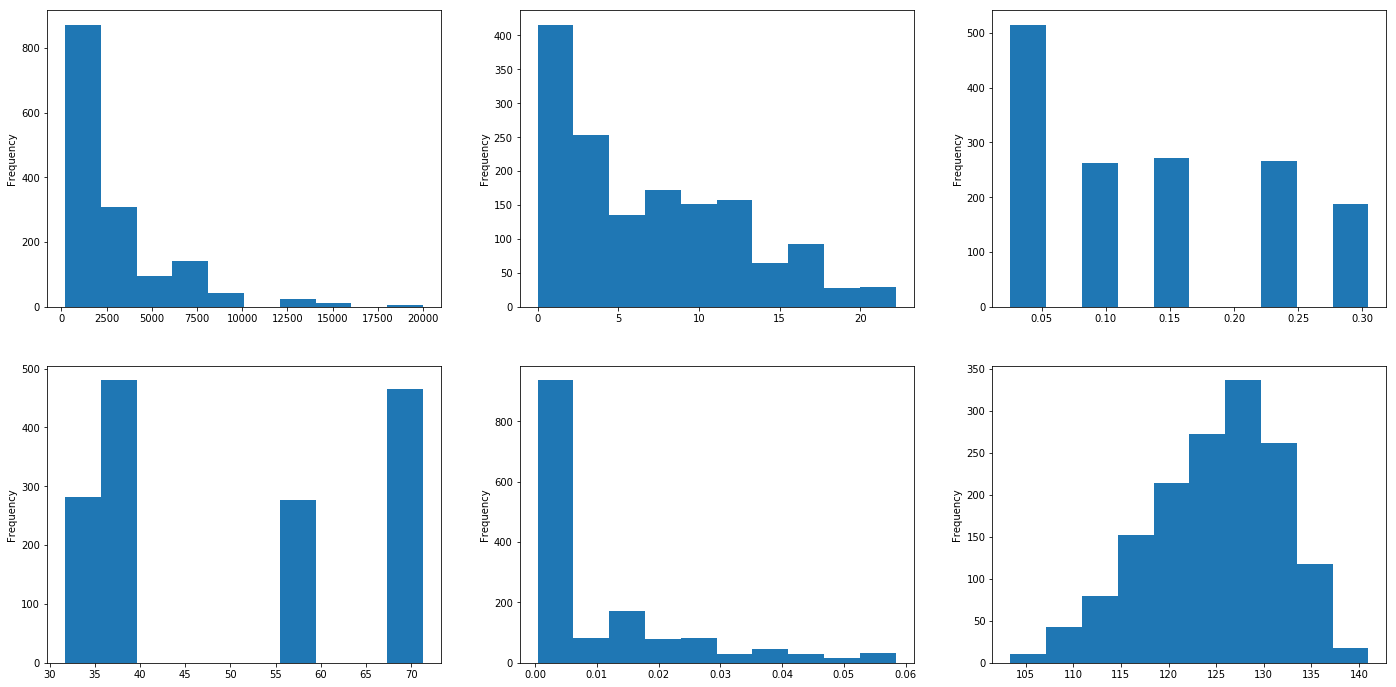

In [76]:
names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]

fig, axes = plt.subplots(2, 3, figsize=(24,12))
noise.loc[:,'frequency'].plot(kind='hist', ax=axes[0][0])
ax.set_title('freq')
noise.loc[:,'angle'].plot(kind='hist', ax=axes[0][1])
noise.loc[:,'chord_length'].plot(kind='hist', ax=axes[0][2])
noise.loc[:,'free_stream_velocity'].plot(kind='hist', ax=axes[1][0])
noise.loc[:,'displacement_thickness'].plot(kind='hist', ax=axes[1][1])
noise.loc[:,'self_noise'].plot(kind='hist', ax=axes[1][2])

#How do I get title labels for these? 

- Which variables are approximately normally distributed?

Only self noise seems to be normally distributed

- Which variables show strong skew?

displacement thickness, frequency, and angle. 

- Make a scatterplot of each feature variable with the target variable.

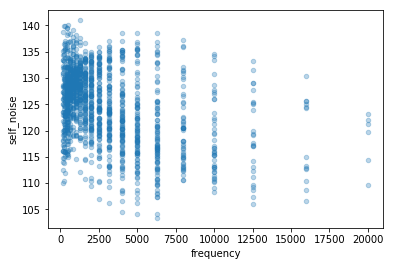

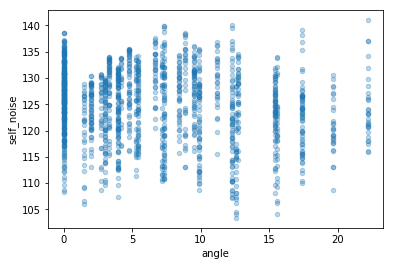

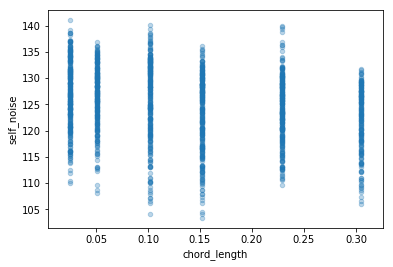

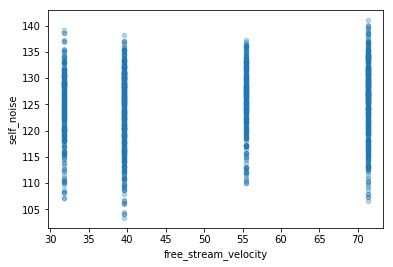

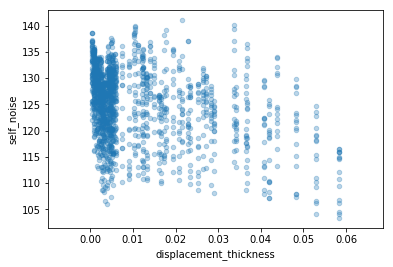

In [80]:
ax = noise.plot(kind='scatter', x='frequency', y='self_noise', alpha=0.3)
ax = noise.plot(kind='scatter', x='angle', y='self_noise', alpha=0.3)
ax = noise.plot(kind='scatter', x= 'chord_length', y='self_noise', alpha=0.3)
ax = noise.plot(kind='scatter', x='free_stream_velocity', y='self_noise', alpha=0.3)
ax = noise.plot(kind='scatter', x='displacement_thickness', y='self_noise', alpha=0.3)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

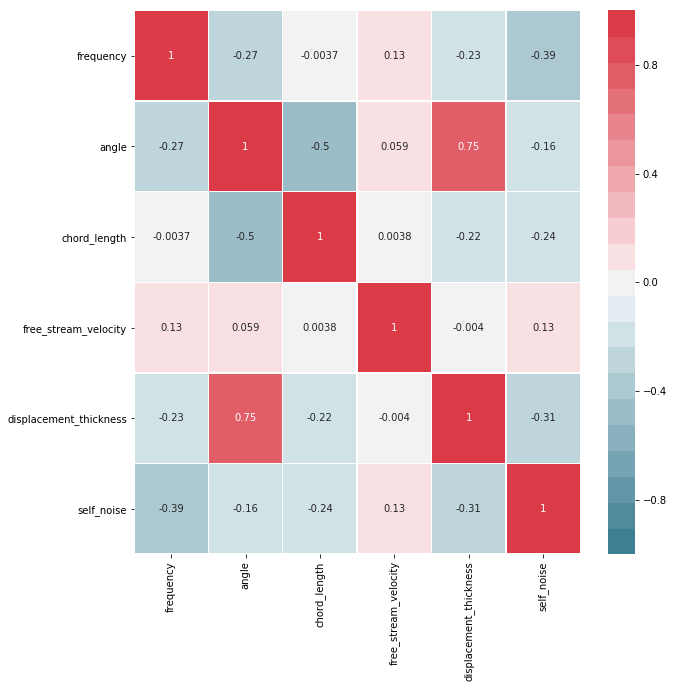

In [83]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(noise.corr(), ax=ax, linewidths=.5, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

It seems that 'frequency' and 'angle' are highly correlated with eachother so they should not be used together in a model. All of the features are not highly linearly correlated with the target variable, 'self_noise' so some additional feature engineering or the use of a different model than linear regression will need to be used to get good results from this data. 

- Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feat_var = ['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           ]
target_var = ['self_noise']

X = noise.loc[:, feat_var]
y = noise.loc[:, target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.5153850007092657
0.5143623919205496


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training test performed quite poorly compared to the null model, with and R squared value of about .5. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed well on the training set compared to the test set. The testing data scored consistantly around .5 as well. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model definitely has more of a bias problem than a variance problem because the R-squared results for the train and test data are close together but are low. 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [124]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9893118178403226
0.9279707519724523


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The overall predictive performance of the model is much higher using the Random Forest Regressor compared to the linear regression. The bias problem is drastically reduced but there is a slight variance problem in the Random Forest Regressor.  

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [131]:
# To try and reduce the variance in the RFR, I will try changing hyperparameter, 'n_estimator'. The goal is to increase
# the R squared value on the testing data


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.98960572868477
0.9300624790960185


RESLUT: Neither increasing or decreasing the n_estimators had a dramatic effect on the score on the testing score. 

In [135]:
# To try and decrease the bias in the LR model, I will try and remove the one features that are highly correlated with one another - 'angle' and 'frequencly'.

feat_var = ['frequency',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           ]
target_var = ['self_noise']

X = noise.loc[:, feat_var]
y = noise.loc[:, target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.4811331080007727
0.4688425639647476


RESLUT: This had very little effect on the R-squared values. 

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

The credit data set is 16 columns of both categorical and continuous data from credit card applicatons. The data has been changed so that the information is anonymous. I assume that the last column is a binary representation (+/-) of whether or not credit was given based on the other variables. Even though the data is de-contextualized, associations can still be drawn between the input variables and the determination of credit.  

In [232]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


- Find out how many rows and columns are in `credit`.

In [233]:
credit.shape

(690, 16)

- Find out what data types are present.

In [234]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [235]:
# Checking to make sure there are no null values
credit.iloc[:,2].isna().sum()

0

In [236]:
credit.iloc[:,2] = pd.to_numeric(credit.iloc[:,2])
credit.iloc[:,2].head()

0    0.000
1    4.460
2    0.500
3    1.540
4    5.625
Name: 3, dtype: float64

In [237]:
#Removing the "?" and replacing it with ''

credit.iloc[:,1] = credit.iloc[:,1].replace('?','')
credit.iloc[:,1] = pd.to_numeric(credit.iloc[:,1])

- Find out how many null values there are in each columns.

In [238]:
credit.isna().sum()

1      0
2     12
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [239]:
credit.describe()

,2,3,8,11,15
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [240]:
credit.describe(include='object')

,1,4,5,6,7,9,10,12,13,14,16
count,690,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,171,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,468,519,519,137,399,361,395,374,625,132,383


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

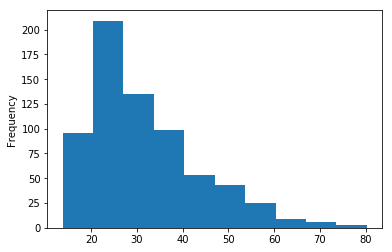

In [241]:
credit.loc[:,2].plot(kind='hist')

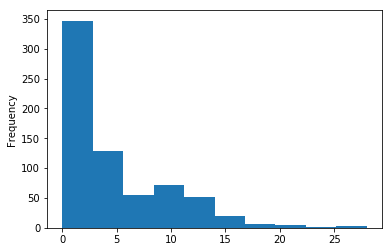

In [242]:
credit.loc[:,3].plot(kind='hist')

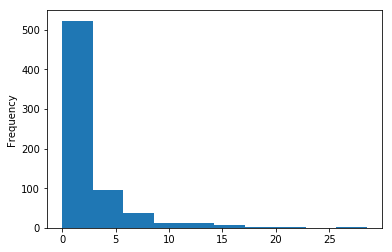

In [243]:
credit.loc[:,8].plot(kind='hist')

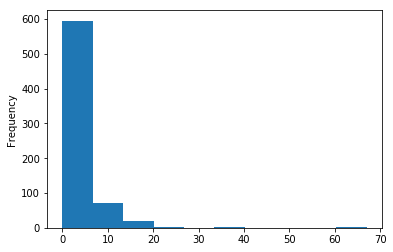

In [244]:
credit.loc[:,11].plot(kind='hist')

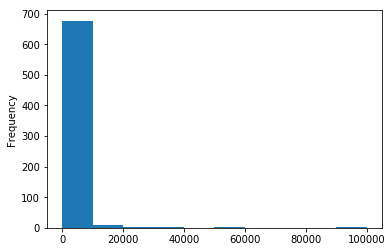

In [245]:
credit.loc[:,15].plot(kind='hist')

- Which variables are approximately normally distributed?

Column 2 is the only column that is normally distributed. 

- Which variables show strong skew?

All other continuous variables are skewed heavily left. 

- Make a scatterplot of each feature variable with the target variable.

In [246]:
credit.loc[:,'credit_decision'] = (credit.loc[:,16] == '+').astype('int')
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,credit_decision
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,1


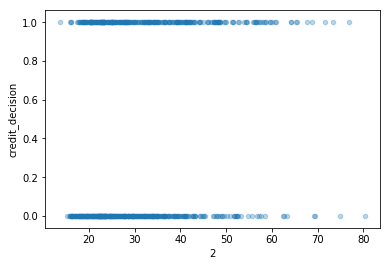

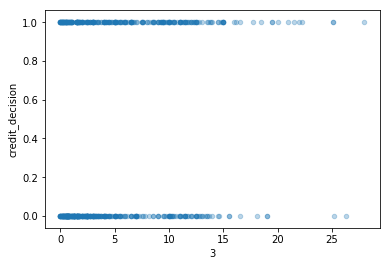

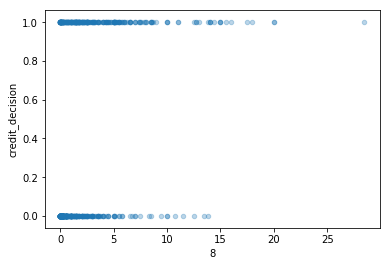

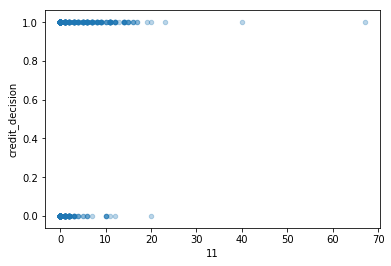

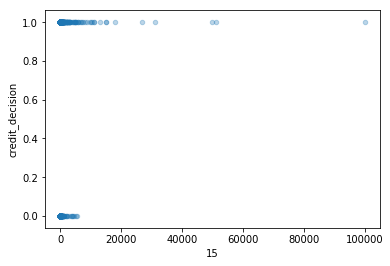

In [247]:
ax = credit.plot(kind='scatter', x= 2, y='credit_decision', alpha=0.3)
ax = credit.plot(kind='scatter', x= 3, y='credit_decision', alpha=0.3)
ax = credit.plot(kind='scatter', x= 8, y='credit_decision', alpha=0.3)
ax = credit.plot(kind='scatter', x= 11, y='credit_decision', alpha=0.3)
ax = credit.plot(kind='scatter', x= 15, y='credit_decision', alpha=0.3)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

In [248]:
# making a df with only continuous variables
credit_cont_var = credit.select_dtypes(['int64', 'float64']).dropna(axis='columns')

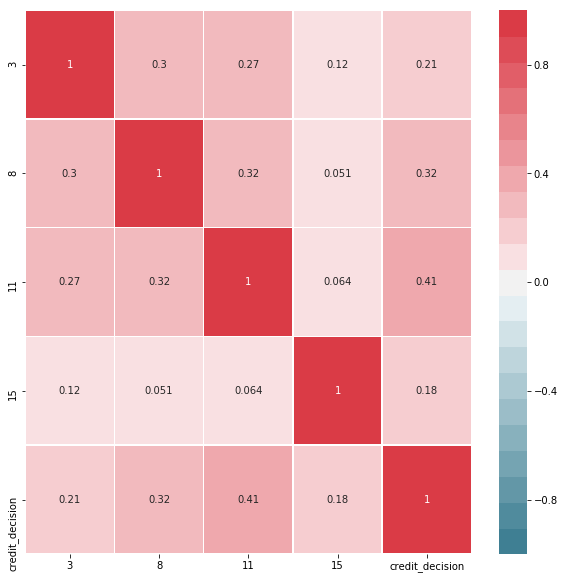

In [249]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(credit_cont_var.corr(), ax=ax, linewidths=.5, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

All the numerical variables are positively correlated with the target variable - 'feature_decision' however, the correlation coeficients are quite low. This means that the results I might get from a logistic regression will probably be quite poor and the data would be better modeled using a decision tree or random forest. 

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [267]:
credit.loc[:,'credit_decision'].value_counts(normalize=True)


0    0.555072
1    0.444928
Name: credit_decision, dtype: float64

- Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [276]:
#dummy coding the categorical variables:
credit_dummies = pd.get_dummies(credit.drop(16, axis='columns'))
credit_dummies.dropna(axis='columns', inplace=True)
credit_dummies.head()

,3,8,11,15,credit_decision,1_?,1_a,1_b,4_?,4_l,...,14_00680,14_00711,14_00720,14_00760,14_00840,14_00928,14_00980,14_01160,14_02000,14_?
0,0.000,1.25,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
target_col = 'credit_decision'
feature_cols = credit_dummies.columns.drop(target_col)
print(feature_cols)

X = credit_dummies.drop(target_col, axis='columns')
y = credit_dummies.loc[:, target_col]

Index([         3,          8,         11,         15,      '1_?',      '1_a',
            '1_b',      '4_?',      '4_l',      '4_u',
       ...
       '14_00680', '14_00711', '14_00720', '14_00760', '14_00840', '14_00928',
       '14_00980', '14_01160', '14_02000',     '14_?'],
      dtype='object', length=220)


In [280]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [285]:
from sklearn.linear_model import LogisticRegressio

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8964803312629399
0.8647342995169082


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

THe model performed well compared to the null model. The null model would have predicted correctly 55% of the time, the logistic regression model predicted corretly 86% of the time. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed slightly better on the training data than the test data. The difference is only about 3% therefore there is only a small variance problem. The model scored in the mid 80s, which is good, but could be better, therefore I would say there is a small bias problem.  

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Neither seems more sever than the other. Both bias and variance are present, but not horribly bad. 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [287]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9958592132505176
0.8840579710144928


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

The RFC decreases the bias but increases the variance. THe scores on the training set and test set are both higher, however the discrepancy between them has increased compared to the Logistic Regression model. 



- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

I will try an improve the RFC model by tuning the hyperparameters, "n_estimators" and "max_features".  The metric used to determine an improved model will be an increase the score on the test set. 

In [289]:
# Finding the best n_estimator 

estimator_range = list(range(10, 310, 10))

RMSE_scores = []

from sklearn.model_selection import cross_val_score
for estimator_num in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator_num, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

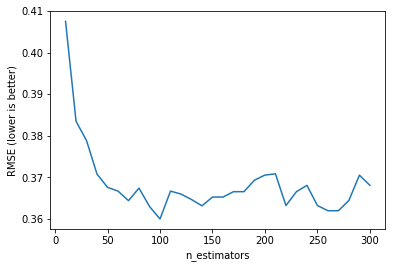

In [291]:
fig, ax = plt.subplots()
ax.plot(estimator_range, RMSE_scores);
ax.set_xlabel('n_estimators');
ax.set_ylabel('RMSE (lower is better)');

It seems like the best n_estimator to use is around 100

In [295]:
#Trying n_estimator = 100 in the RFC

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9958592132505176
0.8695652173913043


The model actually got worse (the score on the test set went down). This is surprising and mystifying. 

In [308]:
#Finding the best max_feature parameter

feature_range = list(range(1, len(feature_cols)+1))

RMSE_scores = []

for num_features in feature_range:
    rfreg = RandomForestClassifier(n_estimators=100, max_features=num_features, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [309]:
#show the best RMSE score
sorted(zip(RMSE_scores, feature_range))[0]

(0.352786574065462, 35)

It seems like the best max_feature hyper paramater to use is 35. 

In [311]:
# Using 35 as the paramerter for "max_features"

rfc = RandomForestClassifier(n_estimators=200, max_features=35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9958592132505176
0.8647342995169082


This again, made the model worse by decreaseing the score on the test set? Very confused. 

- **BONUS:** Keep going! Find ways to make your model better.